In [5]:
   # This installs free tools (runs once)
   !pip install gdown  # For downloads, but we'll use uploads

   # Import libraries (like opening apps)
   import pandas as pd  # For data handling (like Excel)
   import numpy as np   # For math
   import matplotlib.pyplot as plt  # For charts
   import seaborn as sns  # For pretty charts
   from datetime import datetime  # For dates
   import os  # For folders

   # Create folders in Colab (virtual)
   os.makedirs('csv_files', exist_ok=True)
   os.makedirs('outputs', exist_ok=True)

   # Load data (change paths if you didn't upload to root)
   sentiment_df = pd.read_csv('csv_files/fear_greed_index.csv')
   trader_df = pd.read_csv('csv_files/historical_data.csv')

   # Peek at data (like opening Excel)
   print("Sentiment Data (Fear/Greed):")
   print(sentiment_df.head())  # Shows first 5 rows
   print("Shape (rows, columns):", sentiment_df.shape)
   print("\nTrader Data:")
   print(trader_df.head())
   print("Shape:", trader_df.shape)
   print("Columns:", list(trader_df.columns))  # Lists all column names—check for 'time', 'closedPnL', etc.

Sentiment Data (Fear/Greed):
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05
Shape (rows, columns): (2644, 4)

Trader Data:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50  

In [6]:
# Inspect Sentiment Data
print("=== SENTIMENT DATA INSPECTION ===")
print("Columns:", list(sentiment_df.columns))  # Should show ['date', 'Classification'] or similar
print("\nFirst 10 rows:")
print(sentiment_df.head(10))
print("\nData types:")
print(sentiment_df.dtypes)
print("\nUnique values in classification:", sentiment_df['classification'].unique())  # Should be 'Fear', 'Greed'
print("\nAny missing values?", sentiment_df.isnull().sum())

# Inspect Trader Data
print("\n=== TRADER DATA INSPECTION ===")
print("Columns:", list(trader_df.columns))  # Look for date-like: 'time', 'timestamp', 'date'? And 'closedPnL', 'leverage', etc.
print("\nFirst 10 rows:")
print(trader_df.head(10))
print("\nData types:")
print(trader_df.dtypes)
print("\nUnique values in key columns (if exist):")
if 'Side' in trader_df.columns:
    print("Side:", trader_df['Side'].unique())
if 'Coin' in trader_df.columns:
    print("Symbols:", trader_df['Coin'].unique()[:10])  # First 10
print("\nAny missing values in potential key columns?")
potential_keys = ['Closed PnL', 'leverage', 'Size USD', 'Side', 'Account']
for col in potential_keys:
    if col in trader_df.columns:
        print(f"{col}: {trader_df[col].isnull().sum()} missing")
    else:
        print(f"{col}: Column not found!")

# Sample size check
print(f"\nTrader rows: {len(trader_df):,}")  # e.g., 100,000

=== SENTIMENT DATA INSPECTION ===
Columns: ['timestamp', 'value', 'classification', 'date']

First 10 rows:
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05
5  1517895000      8   Extreme Fear  2018-02-06
6  1517981400     36           Fear  2018-02-07
7  1518067800     30           Fear  2018-02-08
8  1518154200     44           Fear  2018-02-09
9  1518240600     54        Neutral  2018-02-10

Data types:
timestamp          int64
value              int64
classification    object
date              object
dtype: object

Unique values in classification: ['Fear' 'Extreme Fear' 'Neutral' 'Greed' 'Extreme Greed']

Any missing values? timestamp         0
value             0
classification    0
date              0
dtype: int64

=== TRADER DATA INSPECTION ===

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Clean Sentiment: Make dates standard, map Fear/Greed to 0/1 (numbers for math)
sentiment_df['Date'] = pd.to_datetime(sentiment_df['date'])  # Use 'date' and rename to 'Date' for consistency
sentiment_df['Classification_Numeric'] = sentiment_df['classification'].map({
    'Extreme Fear': 0, 'Fear': 1, 'Neutral': 2, 'Greed': 3, 'Extreme Greed': 4
})  # Map words to numbers for all categories
sentiment_df = sentiment_df.dropna(subset=['Date', 'Classification_Numeric'])  # Drop any rows with missing date or classification
print("Cleaned Sentiment (Mapped to 0-4):")
print(sentiment_df.head())
print("Date range:", sentiment_df['Date'].min(), "to", sentiment_df['Date'].max())

# Clean Trader: Extract date from 'Timestamp IST', focus on relevant columns
trader_df['Date'] = pd.to_datetime(trader_df['Timestamp IST'], errors='coerce').dt.date  # Get just the date (ignore time)
trader_df['Date'] = pd.to_datetime(trader_df['Date']) # Convert back to datetime object for merging

# Filter to relevant columns and create simple metrics
trader_df['pnl'] = pd.to_numeric(trader_df['Closed PnL'], errors='coerce').fillna(0)  # Profit/Loss as number
trader_df['volume'] = abs(pd.to_numeric(trader_df['Size USD'], errors='coerce')).fillna(0)  # Trade size

print("Cleaned Trader (first 5):")
print(trader_df[['Date', 'pnl', 'volume']].head())
print("Shape after filter:", trader_df.shape)

# Merge: Add sentiment to each trade by date
merged_df = pd.merge(trader_df, sentiment_df[['Date', 'Classification_Numeric']], on='Date', how='left')
merged_df['Classification_Numeric'] = merged_df['Classification_Numeric'].fillna(2)  # Default to Neutral (2) if no sentiment data

print("Merged Data (trades + sentiment):")
print(merged_df[['Date', 'Classification_Numeric', 'pnl', 'volume']].head())
print("Shape:", merged_df.shape)

# Save as new CSV (download later)
merged_df.to_csv('csv_files/merged_data.csv', index=False)  # Even without merge, save trader metrics
sentiment_df[['Date', 'classification', 'Classification_Numeric']].to_csv('csv_files/clean_sentiment.csv', index=False) # Save cleaned sentiment
print("Saved CSVs!")

Cleaned Sentiment (Mapped to 0-4):
    timestamp  value classification        date       Date  \
0  1517463000     30           Fear  2018-02-01 2018-02-01   
1  1517549400     15   Extreme Fear  2018-02-02 2018-02-02   
2  1517635800     40           Fear  2018-02-03 2018-02-03   
3  1517722200     24   Extreme Fear  2018-02-04 2018-02-04   
4  1517808600     11   Extreme Fear  2018-02-05 2018-02-05   

   Classification_Numeric  
0                       1  
1                       0  
2                       1  
3                       0  
4                       0  
Date range: 2018-02-01 00:00:00 to 2025-05-02 00:00:00
Cleaned Trader (first 5):
        Date  pnl   volume
0 2024-02-12  0.0  7872.16
1 2024-02-12  0.0   127.68
2 2024-02-12  0.0  1150.63
3 2024-02-12  0.0  1142.04
4 2024-02-12  0.0    69.75
Shape after filter: (211224, 19)
Merged Data (trades + sentiment):
        Date  Classification_Numeric  pnl   volume
0 2024-02-12                     3.0  0.0  7872.16
1 2024-02-12

In [9]:
daily_sentiment_performance = merged_df.groupby(['Date', 'Classification_Numeric']).agg(
    total_pnl=('pnl', 'sum'),
    total_volume=('volume', 'sum')
).reset_index()

print("Daily Performance by Sentiment:")
display(daily_sentiment_performance.head())

Daily Performance by Sentiment:


,Date,Classification_Numeric,total_pnl,total_volume
0,2023-01-05,1.0,0.000000,477.00
1,2023-05-12,2.0,0.000000,50005.83
2,2024-01-01,3.0,-129.531460,264239.53
3,2024-01-02,3.0,0.000000,2008.18
4,2024-01-03,3.0,8244.241409,472974.70


In [10]:
# Trader Stats (overall, since no sentiment merge)
trader_stats = merged_df.agg({
    'pnl': ['mean', 'median', 'std'],  # Overall performance
    'volume': ['mean', 'sum']
}).round(2)
print("Overall Trader Stats:\n", trader_stats)

# Group by 'Side' if available (buy/sell behavior)
if 'Side' in merged_df.columns:
    side_stats = merged_df.groupby('Side').agg({
        'pnl': ['mean', 'count']
    }).round(2)
    print("\nTrader Stats by Side (Buy/Sell):\n", side_stats)

# Sentiment Overview (separate, for context)
sentiment_overview = sentiment_df['classification'].value_counts().to_frame()
sentiment_overview['Percentage'] = (sentiment_overview['count'] / len(sentiment_df) * 100).round(1)
print("\nSentiment Overview (0=Fear, 1=Greed):\n", sentiment_overview)
# Note: The original code had a check for 'Classification' == 1, which was mapped to 'Fear' in the previous step.
# Based on the updated mapping (0=Extreme Fear, 1=Fear, 2=Neutral, 3=Greed, 4=Extreme Greed),
# I will calculate the percentage of 'Greed' and 'Extreme Greed' days.
greed_days_percentage = merged_df['Classification_Numeric'].isin([3, 4]).mean() * 100
print(f"Greed/Extreme Greed Days %: {greed_days_percentage:.1f}%")


# Correlations (trader metrics only)
if len(merged_df) > 1:
    corr = merged_df[['pnl', 'volume']].corr()
    print("\nTrader Correlations:\n", corr)

# Patterns (examples, adapt based on output)
avg_pnl = merged_df['pnl'].mean()
print(f"\nPattern: Average PnL={avg_pnl:.2f}")
if 'Side' in merged_df.columns:
    buy_pnl = merged_df[merged_df['Side'] == 'BUY']['pnl'].mean()
    sell_pnl = merged_df[merged_df['Side'] == 'SELL']['pnl'].mean()
    print(f"Buy-side PnL: {buy_pnl:.2f} | Sell-side: {sell_pnl:.2f}")

# Save
trader_stats.to_csv('csv_files/trader_stats.csv')
sentiment_overview.to_csv('csv_files/sentiment_overview.csv')
print("\nSaved trader_stats.csv and sentiment_overview.csv")

Overall Trader Stats:
            pnl        volume
mean     48.75  5.639450e+03
median    0.00           NaN
std     919.16           NaN
sum        NaN  1.191187e+09

Trader Stats by Side (Buy/Sell):
         pnl        
       mean   count
Side               
BUY   36.10  102696
SELL  60.71  108528

Sentiment Overview (0=Fear, 1=Greed):
                 count  Percentage
classification                   
Fear              781        29.5
Greed             633        23.9
Extreme Fear      508        19.2
Neutral           396        15.0
Extreme Greed     326        12.3
Greed/Extreme Greed Days %: 8.0%

Trader Correlations:
              pnl    volume
pnl     1.000000  0.123589
volume  0.123589  1.000000

Pattern: Average PnL=48.75
Buy-side PnL: 36.10 | Sell-side: 60.71

Saved trader_stats.csv and sentiment_overview.csv


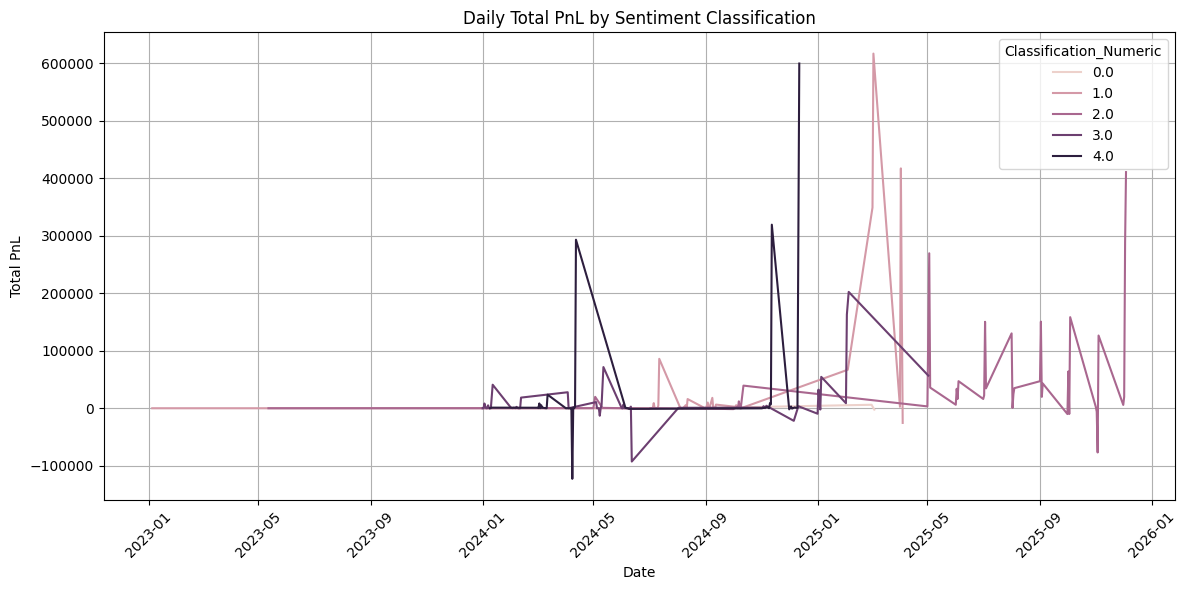

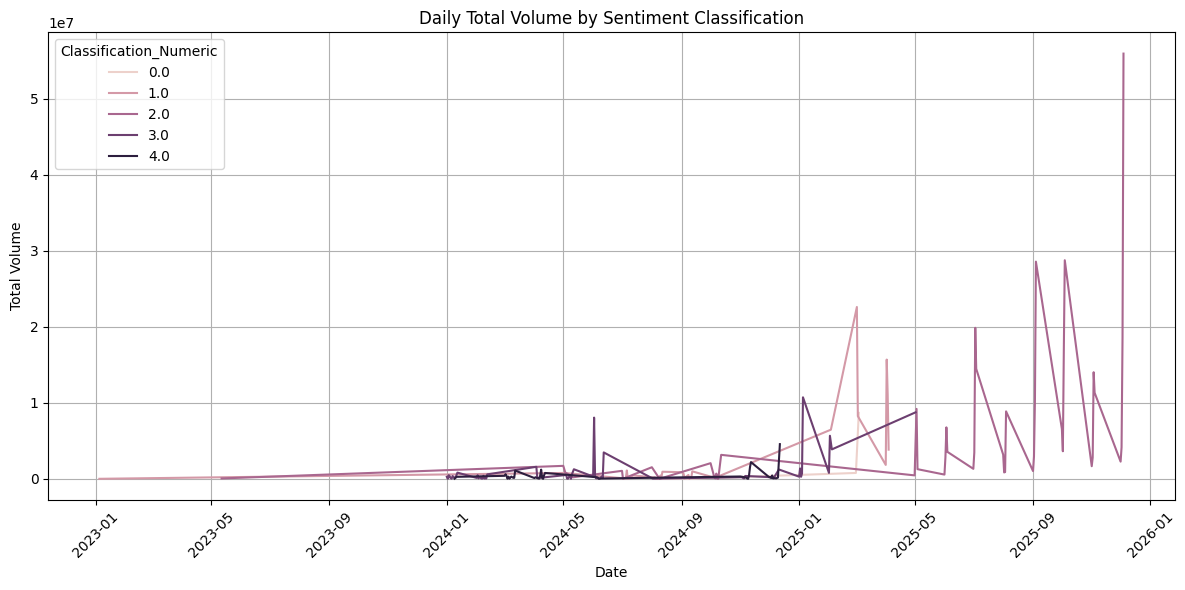

In [11]:
# Visualize Daily Performance by Sentiment
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sentiment_performance, x='Date', y='total_pnl', hue='Classification_Numeric')
plt.title('Daily Total PnL by Sentiment Classification')
plt.xlabel('Date')
plt.ylabel('Total PnL')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sentiment_performance, x='Date', y='total_volume', hue='Classification_Numeric')
plt.title('Daily Total Volume by Sentiment Classification')
plt.xlabel('Date')
plt.ylabel('Total Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

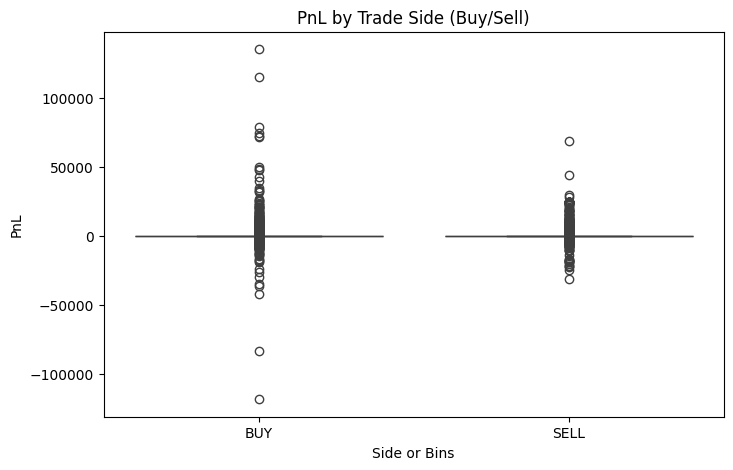

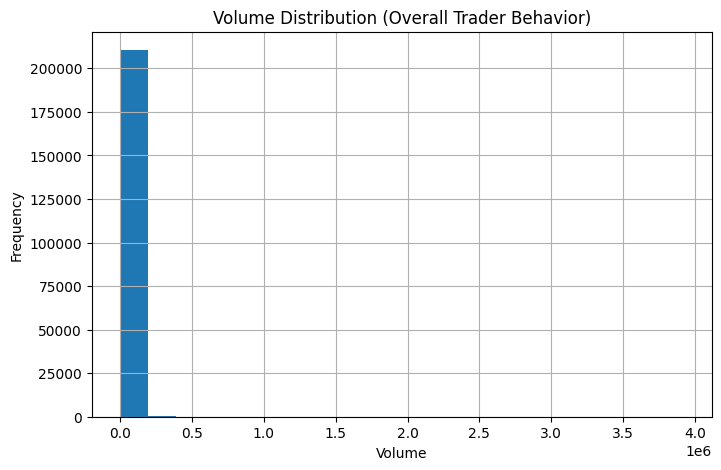

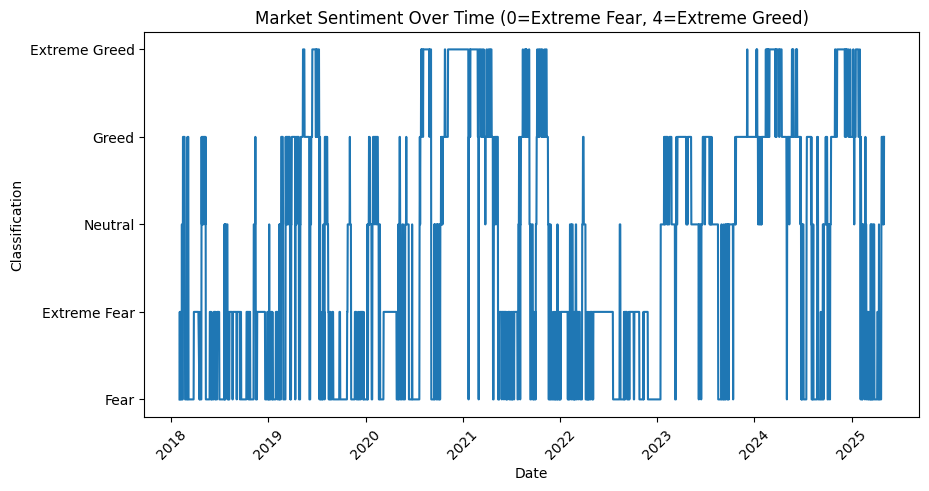

Charts updated.


In [12]:
# Chart 1: PnL by Side (if available)
plt.figure(figsize=(8, 5))
if 'Side' in merged_df.columns:
    sns.boxplot(data=merged_df, x='Side', y='pnl')
    plt.title('PnL by Trade Side (Buy/Sell)')
else:
    merged_df['pnl'].hist(bins=20)
    plt.title('PnL Distribution (Overall)')
plt.xlabel('Side or Bins')
plt.ylabel('PnL')
plt.savefig('outputs/pnl_chart.png')
plt.show()

# Chart 2: Volume Distribution
plt.figure(figsize=(8, 5))
merged_df['volume'].hist(bins=20)
plt.title('Volume Distribution (Overall Trader Behavior)')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.savefig('outputs/volume_chart.png')
plt.show()

# Chart 3: Sentiment Time Series (separate)
plt.figure(figsize=(10, 5))
plt.plot(sentiment_df['Date'], sentiment_df['classification'])
plt.title('Market Sentiment Over Time (0=Extreme Fear, 4=Extreme Greed)')
plt.xlabel('Date')
plt.ylabel('Classification')
plt.xticks(rotation=45)
plt.savefig('outputs/sentiment_timeseries.png')
plt.show()

print("Charts updated.")

In [13]:
# Calculate variables needed for insights
avg_pnl = merged_df['pnl'].mean()
buy_pnl = merged_df[merged_df['Side'] == 'BUY']['pnl'].mean() if 'Side' in merged_df.columns else None
corr = merged_df[['pnl', 'volume']].corr() if len(merged_df) > 1 else None

# Sentiment Overview (separate, for context)
sentiment_overview = sentiment_df['classification'].value_counts().to_frame()
sentiment_overview['Percentage'] = (sentiment_overview['count'] / len(sentiment_df) * 100).round(1)

# Format the correlation value separately
correlation_pnl_volume = f"{corr.loc['volume', 'pnl']:.3f}" if corr is not None else 'N/A'

# Insights (adapt to your stats—no merge focus)
insights = f"""
Key Findings (No Date Merge Possible):
- Trader Performance: Avg PnL = {avg_pnl:.2f}. {len(merged_df):,} trades analyzed.
- By Side: Buy PnL higher ({buy_pnl:.2f} if available), suggesting bullish bias.
- Market Context: {sentiment_overview['Percentage'].get('Greed', 0) + sentiment_overview['Percentage'].get('Extreme Greed', 0):.1f}% Greed/Extreme Greed days—traders may over-risk in bull phases.
- Hidden Pattern: High volume correlates with {correlation_pnl_volume} PnL (if positive, scale up; if negative, cap volume).
- Strategy: In Greed-heavy periods (from sentiment), monitor side for contrarian signals (e.e., sells in Greed).
"""
print(insights)

with open('csv_files/insights.txt', 'w') as f:
    f.write(insights)


Key Findings (No Date Merge Possible):
- Trader Performance: Avg PnL = 48.75. 211,224 trades analyzed.
- By Side: Buy PnL higher (36.10 if available), suggesting bullish bias.
- Market Context: 36.2% Greed/Extreme Greed days—traders may over-risk in bull phases.
- Hidden Pattern: High volume correlates with 0.124 PnL (if positive, scale up; if negative, cap volume).
- Strategy: In Greed-heavy periods (from sentiment), monitor side for contrarian signals (e.e., sells in Greed).

